In [74]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

test_dir = '../input/intel-image-classification/seg_test/seg_test/'
train_dir = '../input/intel-image-classification/seg_train/seg_train/'
pred_dir = '../input/intel-image-classification/seg_pred/seg_pred/'

img_size = (150,150)
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir, image_size=img_size, label_mode='categorical', batch_size=64)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir, image_size=img_size, label_mode='categorical', batch_size=64)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [75]:
names = np.array(train_data.class_names)
train_data.class_names

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [76]:
print(len(train_data))
print(train_data)

220
<BatchDataset shapes: ((None, 150, 150, 3), (None, 6)), types: (tf.float32, tf.float32)>


In [77]:
model_0 = tf.keras.Sequential([
     tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
    ,tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=img_size+(3,))
    ,tf.keras.layers.MaxPool2D(pool_size=(2,2))
    ,tf.keras.layers.Conv2D(32, 3, activation='relu')
    ,tf.keras.layers.MaxPool2D(pool_size=(2,2))
    ,tf.keras.layers.Conv2D(32, 3, activation='relu')
    ,tf.keras.layers.MaxPool2D(pool_size=(2,2))
    ,tf.keras.layers.Conv2D(32, 3, activation='relu')
    ,tf.keras.layers.MaxPool2D(pool_size=(2,2))
    ,tf.keras.layers.Flatten()
    ,tf.keras.layers.Dense(6, activation='softmax')
])

model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy()
               ,optimizer=tf.keras.optimizers.Adam()
               ,metrics=['accuracy'])

history_0 = model_0.fit(train_data
                       ,epochs=10
                       ,steps_per_epoch=len(train_data)
                       ,validation_data=test_data
                       ,validation_steps=len(test_data))

Epoch 1/10
220/220 [==============================] - 244s 1s/step - loss: 1.3199 - accuracy: 0.4469 - val_loss: 1.0310 - val_accuracy: 0.6037
Epoch 2/10
220/220 [==============================] - 233s 1s/step - loss: 0.9008 - accuracy: 0.6602 - val_loss: 0.7475 - val_accuracy: 0.7307
Epoch 3/10
220/220 [==============================] - 231s 1s/step - loss: 0.7114 - accuracy: 0.7430 - val_loss: 0.6605 - val_accuracy: 0.7763
Epoch 4/10
220/220 [==============================] - 231s 1s/step - loss: 0.6184 - accuracy: 0.7831 - val_loss: 0.6369 - val_accuracy: 0.7643
Epoch 5/10
220/220 [==============================] - 230s 1s/step - loss: 0.5728 - accuracy: 0.7963 - val_loss: 0.5635 - val_accuracy: 0.7993
Epoch 6/10
220/220 [==============================] - 230s 1s/step - loss: 0.5159 - accuracy: 0.8141 - val_loss: 0.5456 - val_accuracy: 0.8063
Epoch 7/10
220/220 [==============================] - 230s 1s/step - loss: 0.4826 - accuracy: 0.8248 - val_loss: 0.5484 - val_accuracy: 0.8057

In [78]:
score = model_0.evaluate(test_data, verbose=1)

47/47 [==============================] - 15s 308ms/step - loss: 0.4869 - accuracy: 0.8330


In [79]:
print('Test Loss : ', score[0])
print('Test Accuracy : ', score[1])

Test Loss :  0.48687466979026794
Test Accuracy :  0.8330000042915344


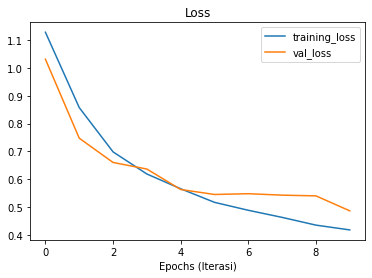

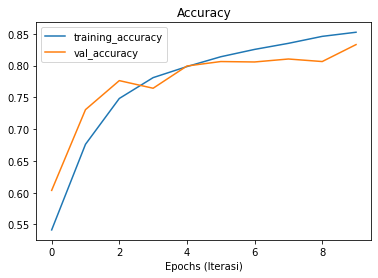

In [93]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs (Iterasi)')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs (Iterasi)')
    plt.legend();
    

plot_loss_curves(history_0)

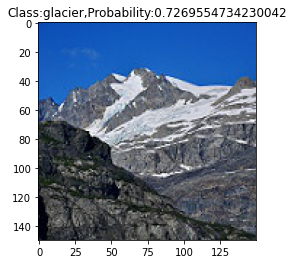

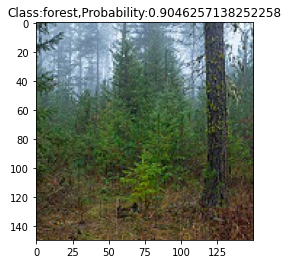

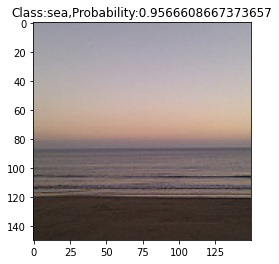

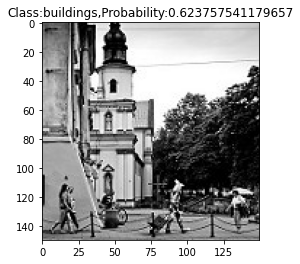

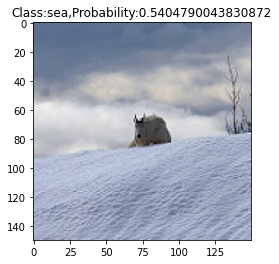

In [94]:
pred_list = os.listdir(pred_dir)
images = []
for i in range(5):
    images.append(pred_dir + random.choice(pred_list))

for img in images:
    test_img = tf.keras.preprocessing.image.load_img(img, target_size = img_size)
    test_img = tf.keras.preprocessing.image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis = 0)
    result = model_0.predict(test_img)
    
    plt.title('Class:{},Probability:{}'.format(names[result.argmax()],result.max()))
    plt.imshow(tf.keras.preprocessing.image.img_to_array(tf.keras.preprocessing.image.load_img(img,target_size=img_size))/255.)
    plt.show()